
# 模型评估与选择  

## 一、选择数据集  
1. **数据集简介**  
   - 数据集名称：UCI信用卡违约数据集（Credit Card Default Dataset）。  
   - 样本数量：30,000。  
   - 特征维度：23个特征，包括数值型和类别型特征。  

2. **数据集基本特征分析**  
   - 对每个特征进行统计分析（均值、标准差、缺失值比例等）。  
   - 数据可视化：  
     - 数值特征分布直方图。  
     - 类别特征用柱状图表示分布情况。  
     - 特征之间的相关性热力图。  



## 二、数据预处理  
1. **缺失值处理**  
   - 对缺失值特征填充（均值、中位数或特定策略）。  

2. **特征标准化**  
   - 使用Min-Max缩放或Z-Score标准化所有数值特征。  

3. **数据集划分**  
   - 将数据集划分为训练集和测试集（8:2比例），并确保类别分布均匀。  

4. **降维处理**  
   - 使用PCA将维度从23降至适当维度（如2或3维）。  
   - 保留未降维数据作为对照。  


## 三、分类器的分类  
### 1. KNN分类  
   - 调整邻居数k（如3、5、7）。  
   - 比较不同距离度量方式（欧几里得、曼哈顿等）。  

### 2. 神经网络分类  
   - 使用简单全连接神经网络：  
     - 输入层：与特征维度一致。  
     - 隐藏层：可设置为1-2层，节点数量灵活调整。  
     - 输出层：1个节点（Sigmoid激活）用于二分类任务。  

### 3. 决策树分类  
   - 使用信息增益或基尼系数作为划分标准。  
   - 设置最大深度或叶节点数以控制模型复杂度。  


## 四、模型评估与误差分析  
1. **纵向对比分析（未降维 vs. 降维）**  
   - 每个分类器在未降维和降维数据上的**准确率**、**分类时间**等指标对比。  
   - 绘制柱状图对比每个分类器在不同数据处理方式下的性能差异。  

2. **横向对比分析（分类器之间的对比）**  
   - 对比KNN、神经网络和决策树在未降维和降维数据上的**准确率**和**分类时间**。  
   - 绘制条形图或折线图展示不同分类器性能。  

3. **误差分析**  
   - 绘制混淆矩阵，分析误分类情况。  
   - 分析降维对分类器的实际影响：如信息丢失程度和计算效率变化。  






In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 数据集加载
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
data = pd.read_excel(url, header=1, skiprows=0)
# 查看数据的基本信息
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [40]:
# 2. 统计分析
# 计算每个特征的基本统计量
summary_stats = data.describe().transpose()

# 计算每个特征的缺失值比例
missing_values = data.isnull().mean() * 100

# 合并统计量和缺失值比例
summary_stats['missing_percentage'] = missing_values

# 输出统计分析结果
print(summary_stats)


                              count           mean            std       min  \
ID                          30000.0   15000.500000    8660.398374       1.0   
LIMIT_BAL                   30000.0  167484.322667  129747.661567   10000.0   
SEX                         30000.0       1.603733       0.489129       1.0   
EDUCATION                   30000.0       1.853133       0.790349       0.0   
MARRIAGE                    30000.0       1.551867       0.521970       0.0   
AGE                         30000.0      35.485500       9.217904      21.0   
PAY_0                       30000.0      -0.016700       1.123802      -2.0   
PAY_2                       30000.0      -0.133767       1.197186      -2.0   
PAY_3                       30000.0      -0.166200       1.196868      -2.0   
PAY_4                       30000.0      -0.220667       1.169139      -2.0   
PAY_5                       30000.0      -0.266200       1.133187      -2.0   
PAY_6                       30000.0      -0.291100  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

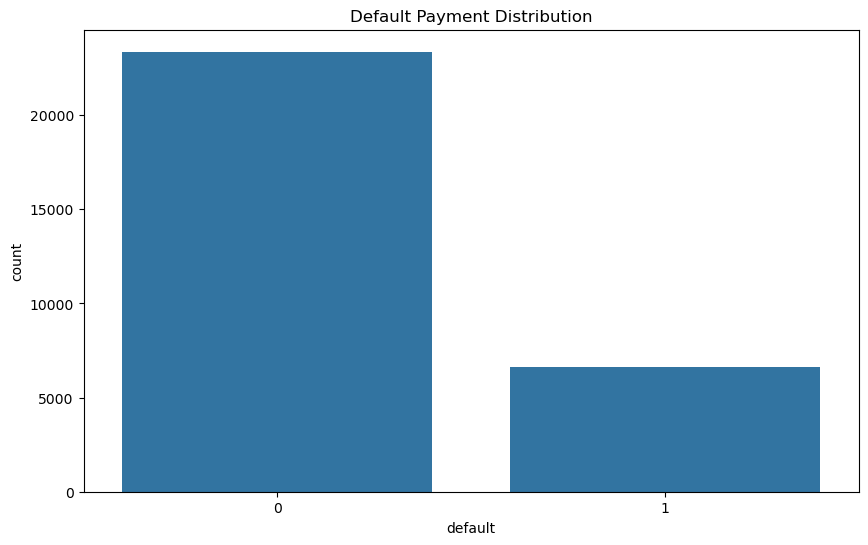

In [3]:

# 数据清理
data.rename(columns=lambda x: x.strip(), inplace=True)  # 清理列名
data.rename(columns={"default payment next month": "default"}, inplace=True)

# 数据集信息
print(data.info())
print(data.describe())

# 数据分布可视化
plt.figure(figsize=(10, 6))
sns.countplot(x="default", data=data)
plt.title("Default Payment Distribution")
plt.show()


ValueError: num must be an integer with 1 <= num <= 9, not 10

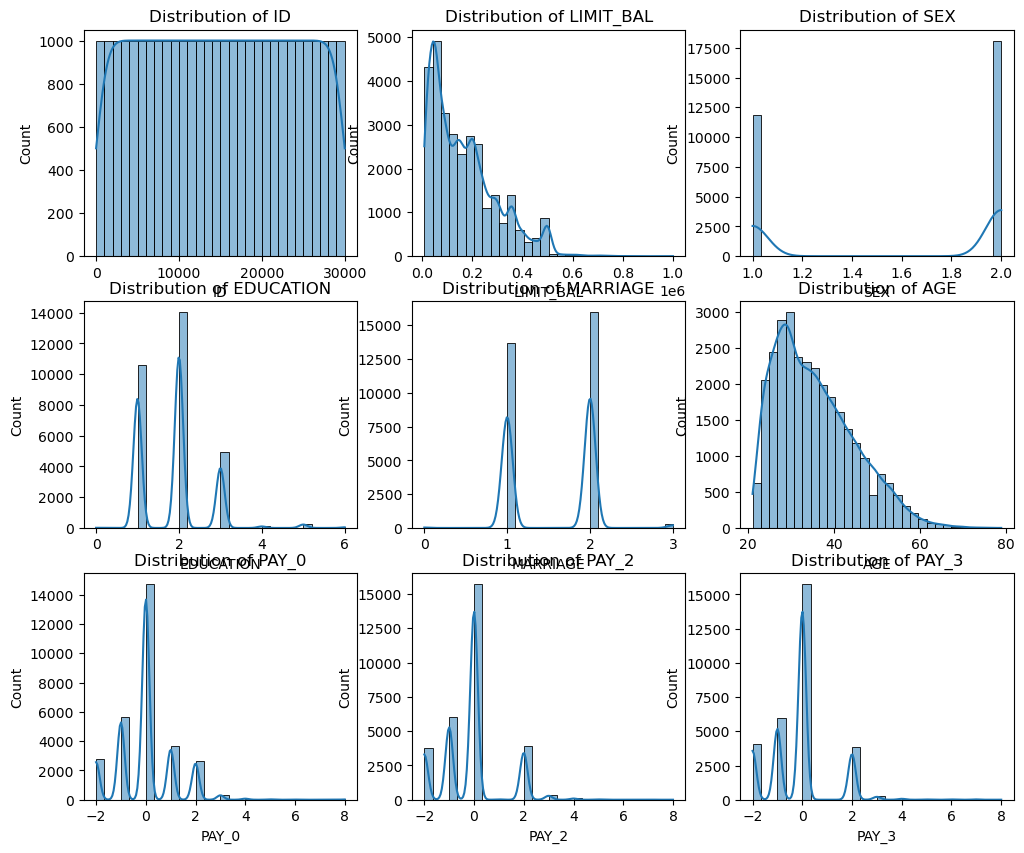

In [41]:
# 3. 数据可视化
# 数值特征的分布直方图
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# 类别特征的分布柱状图
categorical_features = data.select_dtypes(include=['object']).columns

plt.figure(figsize=(12, 6))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=data[feature], palette="Set2")
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# 特征之间的相关性热力图
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()

In [4]:
# 检查缺失值
missing_values = data.isnull().sum()
print("缺失值统计：\n", missing_values)

# 对于没有缺失值的简单验证
assert missing_values.sum() == 0, "存在缺失值，请进一步处理"


缺失值统计：
 ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64


In [5]:
from sklearn.preprocessing import StandardScaler

# 提取特征与目标变量
X = data.iloc[:, :-1]
y = data["default"]

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
from sklearn.model_selection import train_test_split

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


降维后特征形状： (24000, 3)


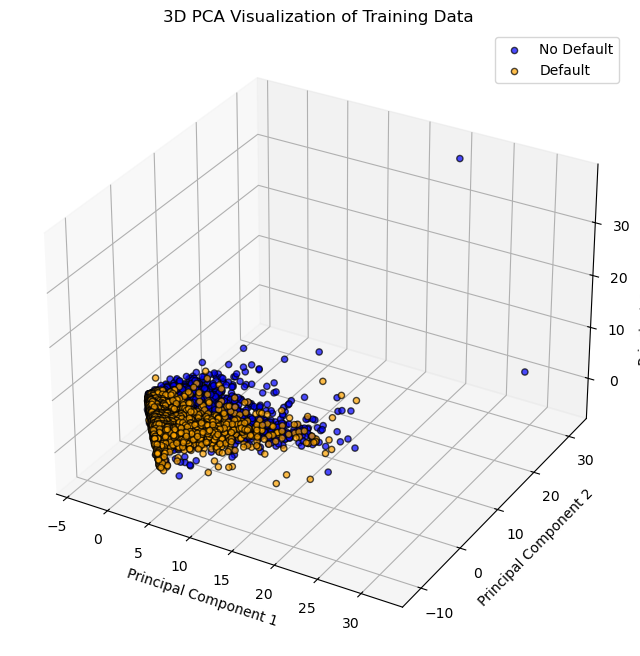

In [15]:
from sklearn.decomposition import PCA

# PCA降维至3维
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("降维后特征形状：", X_train_pca.shape)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 创建 3D 图形
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制不同类别的点
categories = [0, 1]  # 假设目标变量有两类
colors = ['blue', 'orange']
labels = ['No Default', 'Default']

for category, color, label in zip(categories, colors, labels):
    indices = y_train == category
    ax.scatter(
        X_train_pca[indices, 0], X_train_pca[indices, 1], X_train_pca[indices, 2],
        c=color, label=label, alpha=0.7, edgecolor='k'
    )

# 设置轴标签
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# 图例和标题
ax.legend()
ax.set_title("3D PCA Visualization of Training Data")
plt.show()



In [26]:
# 记录开始时间
start_time = time.time()

# 创建KNN模型并训练
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 记录结束时间
end_time = time.time()

# 计算训练时间
training_time_before = end_time - start_time
print(f"KNN训练时间（降维前）：{training_time_before:.4f}秒")

# 预测结果
y_pred_knn_before = knn.predict(X_test)

# 计算准确率
accuracy_knn_before = accuracy_score(y_test, y_pred_knn_before)
print(f"KNN（降维前）的准确率：{accuracy_knn_before:.4f}")


KNN训练时间（降维前）：0.0030秒
KNN（降维前）的准确率：0.7935


In [27]:
# 记录开始时间
start_time = time.time()

# 创建KNN模型并训练
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)

# 记录结束时间
end_time = time.time()

# 计算训练时间
training_time_after = end_time - start_time
print(f"KNN训练时间（降维后）：{training_time_after:.4f}秒")

# 预测结果
y_pred_knn_pca = knn_pca.predict(X_test_pca)

# 计算准确率
accuracy_knn_pca = accuracy_score(y_test, y_pred_knn_pca)
print(f"KNN（降维后）的准确率：{accuracy_knn_pca:.4f}")


KNN训练时间（降维后）：0.0086秒
KNN（降维后）的准确率：0.7817


In [28]:
# 结果存储
results = {
    "Model": ["KNN (Full Features)", "KNN (PCA 3D)"],
    "Accuracy": [accuracy_knn_before, accuracy_knn_pca],
    "Training Time (seconds)": [training_time_before, training_time_after]
}

# 输出对比结果
df_results = pd.DataFrame(results)
print(df_results)


                 Model  Accuracy  Training Time (seconds)
0  KNN (Full Features)  0.793500                 0.003004
1         KNN (PCA 3D)  0.781667                 0.008623


In [24]:
import time
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 记录开始时间
start_time_nn_before = time.time()

# 创建神经网络模型并训练（降维前）
mlp_before = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
mlp_before.fit(X_train, y_train)

# 记录结束时间
end_time_nn_before = time.time()

# 计算训练时间
training_time_nn_before = end_time_nn_before - start_time_nn_before
print(f"神经网络训练时间（降维前）：{training_time_nn_before:.4f}秒")

# 预测结果
y_pred_nn_before = mlp_before.predict(X_test)

# 计算准确率
accuracy_nn_before = accuracy_score(y_test, y_pred_nn_before)
print(f"神经网络（降维前）的准确率：{accuracy_nn_before:.4f}")


神经网络训练时间（降维前）：11.2529秒
神经网络（降维前）的准确率：0.8095


In [25]:
# 记录开始时间
start_time_nn_after = time.time()

# 创建神经网络模型并训练（降维后）
mlp_after = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
mlp_after.fit(X_train_pca, y_train)

# 记录结束时间
end_time_nn_after = time.time()

# 计算训练时间
training_time_nn_after = end_time_nn_after - start_time_nn_after
print(f"神经网络训练时间（降维后）：{training_time_nn_after:.4f}秒")

# 预测结果
y_pred_nn_after = mlp_after.predict(X_test_pca)

# 计算准确率
accuracy_nn_after = accuracy_score(y_test, y_pred_nn_after)
print(f"神经网络（降维后）的准确率：{accuracy_nn_after:.4f}")


神经网络训练时间（降维后）：4.2891秒
神经网络（降维后）的准确率：0.8030


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 构建神经网络
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 训练模型
start_time = time.time()
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=0)
train_time = time.time() - start_time

# 评估模型
loss, accuracy_nn = model.evaluate(X_test, y_test, verbose=0)
print(f"神经网络准确率：{accuracy_nn:.4f}, 训练时间：{train_time:.4f}秒")


c:\Users\wzj\.conda\envs\dataanlyse\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


神经网络准确率：0.8155, 训练时间：6.8434秒


In [29]:
# 结果存储：KNN 和神经网络模型对比
results = {
    "Model": ["KNN (Full Features)", "KNN (PCA 3D)", "Neural Network (Full Features)", "Neural Network (PCA 3D)"],
    "Accuracy": [
        accuracy_knn_before, accuracy_knn_pca,
        accuracy_nn_before, accuracy_nn_after
    ],
    "Training Time (seconds)": [
        training_time_before, training_time_after,
        training_time_nn_before, training_time_nn_after
    ]
}

# 输出对比结果
df_results = pd.DataFrame(results)
print(df_results)


                            Model  Accuracy  Training Time (seconds)
0             KNN (Full Features)  0.793500                 0.003004
1                    KNN (PCA 3D)  0.781667                 0.008623
2  Neural Network (Full Features)  0.809500                11.252938
3         Neural Network (PCA 3D)  0.803000                 4.289071


In [30]:
import time
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
# 记录开始时间
start_time_dt_before = time.time()

# 创建决策树模型并训练（降维前）
dt_before = DecisionTreeClassifier(criterion="entropy")  # 使用信息增益
dt_before.fit(X_train, y_train)

# 记录结束时间
end_time_dt_before = time.time()

# 计算训练时间
training_time_dt_before = end_time_dt_before - start_time_dt_before
print(f"决策树训练时间（降维前）：{training_time_dt_before:.4f}秒")

# 预测结果
y_pred_dt_before = dt_before.predict(X_test)

# 计算准确率
accuracy_dt_before = accuracy_score(y_test, y_pred_dt_before)
print(f"决策树（降维前）的准确率：{accuracy_dt_before:.4f}")



决策树训练时间（降维前）：0.6800秒
决策树（降维前）的准确率：0.7282


In [32]:
# 记录开始时间
start_time_dt_after = time.time()

# 创建决策树模型并训练（降维后）
dt_after = DecisionTreeClassifier(criterion="entropy")  # 使用信息增益
dt_after.fit(X_train_pca, y_train)

# 记录结束时间
end_time_dt_after = time.time()

# 计算训练时间
training_time_dt_after = end_time_dt_after - start_time_dt_after
print(f"决策树训练时间（降维后）：{training_time_dt_after:.4f}秒")

# 预测结果
y_pred_dt_after = dt_after.predict(X_test_pca)

# 计算准确率
accuracy_dt_after = accuracy_score(y_test, y_pred_dt_after)
print(f"决策树（降维后）的准确率：{accuracy_dt_after:.4f}")


决策树训练时间（降维后）：0.2415秒
决策树（降维后）的准确率：0.7242


In [34]:
# 计算准确率与训练时间的比率
accuracy_time_ratio = [
    accuracy_knn_before / training_time_before,
    accuracy_knn_pca / training_time_after,
    accuracy_nn_before / training_time_nn_before,
    accuracy_nn_after / training_time_nn_after,
    accuracy_dt_before / training_time_dt_before,
    accuracy_dt_after / training_time_dt_after
]

# 结果存储：KNN、神经网络和决策树模型对比，包括比率
results = {
    "Model": [
        "KNN (Full Features)", "KNN (PCA 3D)", 
        "Neural Network (Full Features)", "Neural Network (PCA 3D)",
        "Decision Tree (Full Features)", "Decision Tree (PCA 3D)"
    ],
    "Accuracy": [
        accuracy_knn_before, accuracy_knn_pca,
        accuracy_nn_before, accuracy_nn_after,
        accuracy_dt_before, accuracy_dt_after
    ],
    "Training Time (seconds)": [
        training_time_before, training_time_after,
        training_time_nn_before, training_time_nn_after,
        training_time_dt_before, training_time_dt_after
    ],
    "Accuracy/Time Ratio": accuracy_time_ratio
}

# 输出对比结果
df_results = pd.DataFrame(results)
print(df_results)



                            Model  Accuracy  Training Time (seconds)  \
0             KNN (Full Features)  0.793500                 0.003004   
1                    KNN (PCA 3D)  0.781667                 0.008623   
2  Neural Network (Full Features)  0.809500                11.252938   
3         Neural Network (PCA 3D)  0.803000                 4.289071   
4   Decision Tree (Full Features)  0.728167                 0.679998   
5          Decision Tree (PCA 3D)  0.724167                 0.241465   

   Accuracy/Time Ratio  
0           264.162253  
1            90.645238  
2             0.071937  
3             0.187220  
4             1.070836  
5             2.999059  


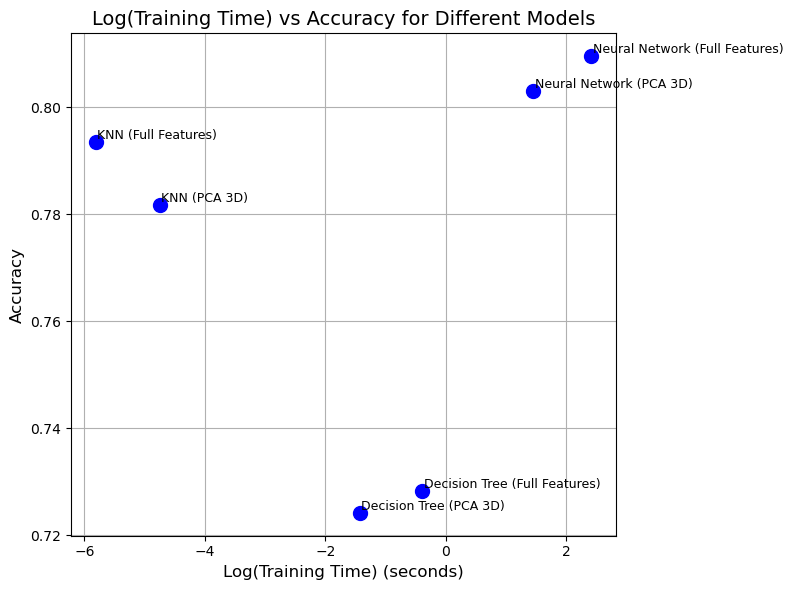

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# 模型名称
models = [
    "KNN (Full Features)", "KNN (PCA 3D)", 
    "Neural Network (Full Features)", "Neural Network (PCA 3D)",
    "Decision Tree (Full Features)", "Decision Tree (PCA 3D)"
]

# 准确率和训练时间
accuracies = [
    accuracy_knn_before, accuracy_knn_pca,
    accuracy_nn_before, accuracy_nn_after,
    accuracy_dt_before, accuracy_dt_after
]
training_times = [
    training_time_before, training_time_after,
    training_time_nn_before, training_time_nn_after,
    training_time_dt_before, training_time_dt_after
]

# 对训练时间取自然对数
log_training_times = np.log(training_times)

# 创建散点图（训练时间为横轴，准确率为纵轴）
plt.figure(figsize=(8, 6))
plt.scatter(log_training_times, accuracies, color='blue', s=100)

# 为每个点添加标签
for i, model in enumerate(models):
    plt.text(log_training_times[i] + 0.02, accuracies[i], model, fontsize=9, ha='left', va='bottom')

# 设置图形标题和轴标签
plt.title('Log(Training Time) vs Accuracy for Different Models', fontsize=14)
plt.xlabel('Log(Training Time) (seconds)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# 显示图形
plt.grid(True)
plt.tight_layout()
plt.show()
